# Running a Regression

We will be running a lot of regressions and related models in this course.  This cheat sheet will show you how to run a regression on the sales data tab of the Class 3 Problem set.  As you will see, aside from some initial challenges with figuring out the command’s syntax, running a regression is generally very easy.  Knowing what to run and what to do with the results – that is much more challenging.

We will start this set of Cheat Sheet tasks by building a very simple linear regression model:

$$
\text{Order_Size} = \beta_0 + \beta_1 \text{Ad_Budget} + \beta_2 \text{Dist}
$$

## Instructions

**1.	Start a new project and load the sales data**

This data is tab 2 in "MMA 860 Assessing and Testing Data File v1.0". 

In [3]:
#Import the required libraries
import pandas as pd
import os.path as osp
import os

#Use the read_excel function to pull data from the 'Sales Data' sheet
db_dir = os.getcwd()
data_path = db_dir + '/MMA 860 Assessing and Testing Data File v1.0.xlsx'
#Use the read_excel function to pull data from the 'Sales Data' sheet
data = pd.read_excel(
    data_path,sheet_name='Sales Data',index_col='Observation')

data.head()

,Order_Size,Ad_Budget,Male,Distance
Observation,,,,
1,20.77,3975,0,20
2,49.52,10897,0,5
3,66.40,15067,0,4
4,34.43,5898,0,4
5,98.65,24928,0,11


**2. Run some summary statistics**

As before, running $\text{dtypes}$ and $\text{describe()}$ is a good way to get a summary of your dataset.

In [4]:
data.dtypes

Order_Size    float64
Ad_Budget       int64
Male            int64
Distance        int64
dtype: object

In [5]:
data.describe()

,Order_Size,Ad_Budget,Male,Distance
count,200.000000,200.000000,200.000000,200.000000
mean,56.575000,10489.520000,0.280000,8.320000
std,22.310774,6616.043323,0.450126,4.555366
min,8.550000,-2883.000000,0.000000,1.000000
25%,38.712500,5312.750000,0.000000,5.000000
50%,58.325000,9589.000000,0.000000,7.000000
75%,71.532500,14443.500000,1.000000,10.000000
max,135.300000,36039.000000,1.000000,25.000000


**3. Look at the linear regression help file**

To create our model, we will use the sci-kit learn library. Referencing the following documentation for linear regression, we can train our model.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [6]:
#Import the required package from sklearn
from sklearn.linear_model import LinearRegression

'''
In order to input data from a pandas dataframe and into a sci-kit function,
we need to convert the dataframe series into NumPy Arrays. This can be done
with the values function.
'''
train_X = data[['Ad_Budget','Distance']].values
train_y = data['Order_Size'].values

'''
Fitting data to a regression model requires two arguments, the training X
values (independent variables) and the training y values (dependent variables.
In general, most fit functions for models follow this format.
'''
reg = LinearRegression().fit(train_X, train_y)

You’ve now trained your first predictive model! Before proceeding, explore the link above to look at ways to assess your models performance. Additionally, test out the functions used to print the coefficients.

# Assessing a Model

I think of model assessment as following this process:

1. Does the model have any predictive power? (Check the F-Test)
2. Do the variables we have included belong in the model? (Check the T-Tests)
3. Have we violated any regression assumptions (Check the plots)
4. Is the $R^2$ sufficient for business requirements?

$R^2$ is an assessment of model fit – it represents the proportion of variability in $y$ explained by the model. The **Adjusted** $R^2$ adjusts for the number of variables included in a model, and is a better measure of model fit. The following script outputs the $R^2$ of the model:

In [14]:
print("R-Squared:", reg.score(train_X, train_y))

R-Squared: 0.6445539057412384


This linear regression model is defined by the three $\beta$ coefficients seen above - $\beta_0$ is sometimes called the intercept. The following script produces the coefficients for each variable, which are used to create predictions:

In [15]:
'''
Computing intercept is trivial. The 'slope' coefficients are outputted as a
tuple (consider this analogous to an array or list). We must index the tuple
to get the numeric values. The values appear in the tuple in an order that 
corresponds to the position of the independent variable to which they are the
slope of. For example, X_train has Ad_Budget values first then Distance values 
which results in the order presented below.
'''

print("B_0 =",reg.intercept_)

#Ad_Budget Coefficient
print("B_1 =",reg.coef_[0])

#Distance Coefficient
print("B_2 =",reg.coef_[1])

B_0 = 26.898793857580092
B_1 = 0.0027146220117421037
B_2 = 0.1443658963714999


The coefficients substitute for beta values in the regression equation. In this example, you would replace $\beta_0$ with $26.89$, $\beta_1$ with $0.0027$, and $\beta_2$ with $.144$. Then, by plugging in the values of any observation, you can produce a point estimate. Using the equation we developed, what is the predicted order size if $\text{Ad_Budget}$ is $1000$ and $\text{Dist}$ is $50$? As a bonus, use $\text{reg.predict()}$ to determine this value.

In [16]:
import numpy as np

#The prediction function takes a Numpy array as an argument
reg.predict(np.array([1000,50]).reshape(1,-1))[0]

36.83171068789719

The **Joint F-Test** is a formal hypothesis test to assess whether a model has any predictive ability. It tests the null hypothesis that all coefficients are jointly equal to $0$.

The **t-tests** are formal hypothesis tests for each variable in the model. Each test assesses whether the coefficient for an individual variable is equal to $0$. 

### Stats Model

For linear regression there is an alternative library that exists called Statsmodel that can be used to do model assessment - yes it is in the Anaconda Distribution. One big advantage to using this library is the great summary that you get which contains the T and F statistics.

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

'''
Fitting a model involves passing two arguments to ols: the general formula as
a string and the data set used. Remember that the formula's attributes must
match the column names in the dataframe. Then the fit() function is run and
then summary() can be applied to that model.
'''
model = ols('Order_Size ~ Ad_Budget + Distance',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Order_Size   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     178.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           5.64e-45
Time:                        18:03:49   Log-Likelihood:                -800.86
No. Observations:                 200   AIC:                             1608.
Df Residuals:                     197   BIC:                             1618.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8988      2.583     10.415      0.0

## Plotting Regression Models 

In the next section, we will come across a measurement known as a **residual**. Residuals are the set of differences between our training data and our model's prediction.

A big indicator in the efficacy of the regression model is whether or not the residuals follow a **Normal Distribution**. This would suggest that the errors are due to random error and not some systematic flaw in our model. There are a few plots we can use to check this.

### Residual vs Fitted Values

The data plotted here should have no pattern (e.g., parabola, two clusters, cone shaped) and be evenly distributed around $0$ on the y-axis.

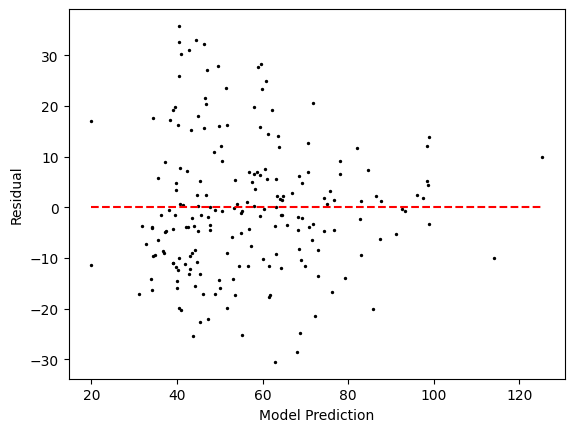

In [19]:
#Residuals calculated by definition above.
predicted_y = reg.predict(train_X)
#Note we can perform element-wise subtraction between arrays like so
residuals = train_y - predicted_y

import matplotlib.pyplot as plt
plt.scatter(predicted_y,residuals,s=2,c='black')

#This line adds the dashed horizontal line
plt.hlines(0,min(predicted_y),max(predicted_y),color='red',linestyles='dashed')

plt.xlabel("Model Prediction")
plt.ylabel("Residual")
plt.show()

We can additionally look at how close the mean of the residuals is to zero.

In [20]:
print('Mean of Residuals:',residuals.mean())

Mean of Residuals: -1.8474111129762605e-15


### Normal Q-Q

The Q-Q plot gives insight into **multivariate normality**. The plot should look similar to the one below – the further the points are from the diagonal line, the more likely there are normality problems.

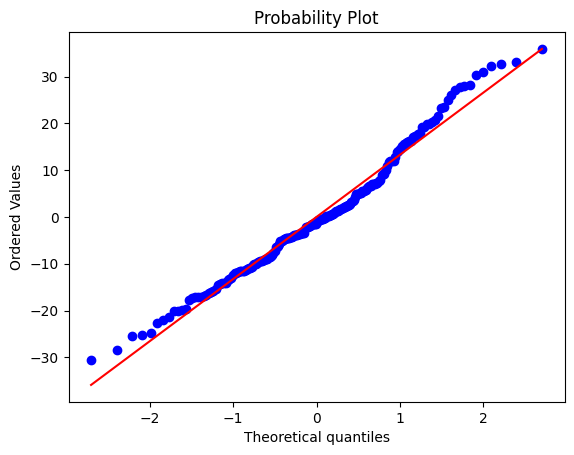

In [21]:
import scipy.stats as stats

'''
Boilerplate code for creating a Normal Q-Q plot. The first two lines declare 
a figure and a subplot. This is an alternate way to output plots which allows 
for more than one plot per output.
'''
fig = plt.figure()
ax = fig.add_subplot(111)

'''
Scipy.Stats has a built-in function for generating this type of plot. This 
function takes three arguments: the measurement being checked (residuals), 
the distribution we are checking against (normal in this case), and the plot 
to plot it to.
'''
stats.probplot(residuals,dist='norm',plot=ax)
plt.show()

### Scale-Location

Use this plot to check the assumptions of equal variance in errors (**homoscedasticity**). You want to see a horizontal line with points spread randomly on either side. If there is a clear cone shaped pattern, it is evidence of heteroskedasticity.

This plot has the predicted values on the x axis and the square root of the absolute value of the standardized residuals on the y axis. When a set of variables become standardized this means that they are referred to by the number of standard deviations that they lie away from their mean.

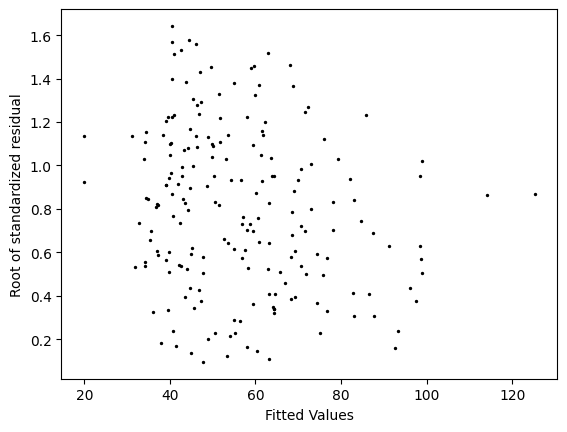

In [22]:
from sklearn.preprocessing import StandardScaler

# First we create an array of normalized residuals using a Scikit function
scaler = StandardScaler().fit(residuals.reshape(-1,1))
norm_residuals = scaler.transform(residuals.reshape(-1,1))

# Plot and take the root and absolute values of the norms
plt.scatter(predicted_y,np.sqrt(np.abs(norm_residuals)),c='black',s=2)
plt.xlabel("Fitted Values")
plt.ylabel("Root of standardized residual")
plt.show()

### Density Plot

There is one last plot worth observing – the density plot. This is another plot used to check for **normality of errors**. You would like to see a largely normal distribution – any other distinct pattern is indicative of a violation in assumptions. You can view it with the following code:

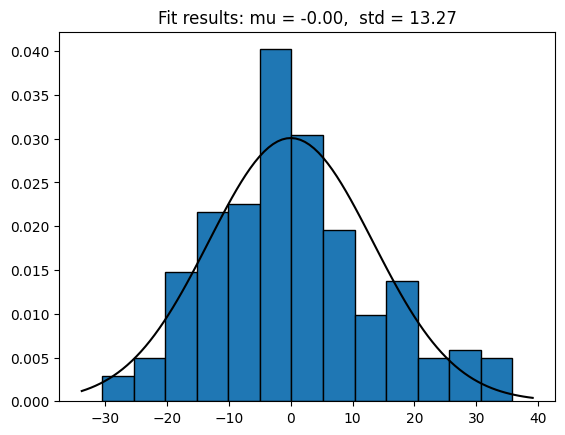

In [23]:
from scipy.stats import norm

# Fit a normal distribution to the data:
mean, std = norm.fit(residuals)

# Plot the histogram.
plt.hist(residuals, bins=13, edgecolor='black', density=True)

# Generate a PDF based on the fitted distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, color='black')
title = "Fit results: mu = %.2f,  std = %.2f" % (mean, std)
plt.title(title)

plt.show()

Take this moment to play around with the number of bins in the histogram. Note some observations on what happens if you have too many or too little bins.

### Residuals vs. Leverage 

The Cook’s Distance plot helps you identify observations with **high leverage** (i.e., those that greatly influence the regression results). In this plot, the x axis is leverage, the y axis is the Studentized residuals (this is similar to standardized residual) and the size of the points indicates the Cook's Distance. Such a plot can be generated with the $\text{influence_plot}$ function from the **StatsModel** library. We use the previously trained model in the code below.

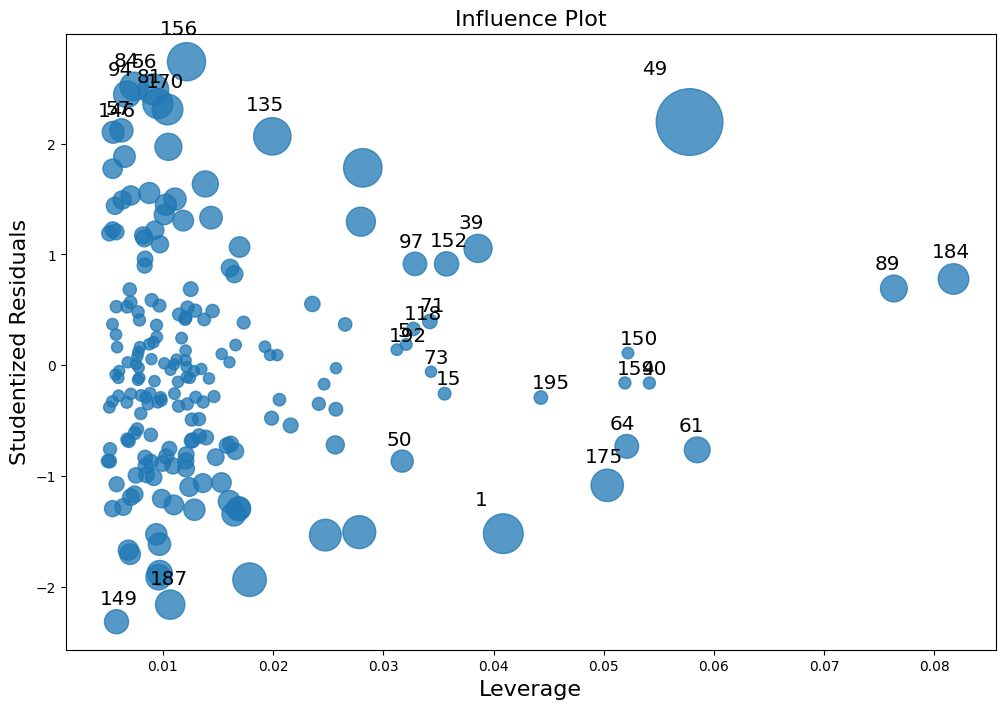

In [24]:
#In a similar fashion to how the QQ plot was built, this plot can be generated.
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.show()

                            OLS Regression Results                            
Dep. Variable:             Order_Size   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     178.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           5.64e-45
Time:                        19:45:48   Log-Likelihood:                -800.86
No. Observations:                 200   AIC:                             1608.
Df Residuals:                     197   BIC:                             1618.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8988      2.583     10.415      0.0

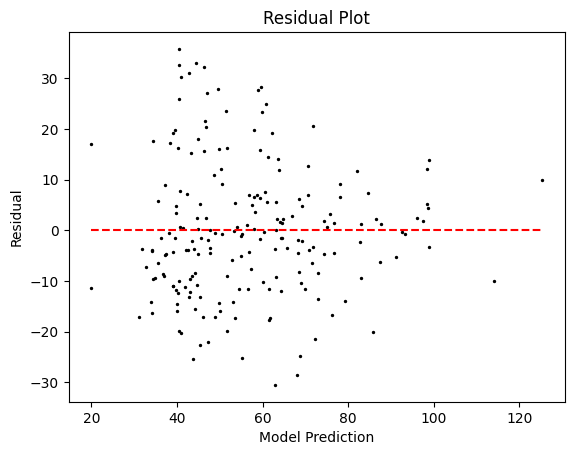

Mean of Residuals: 8.597567102697212e-15


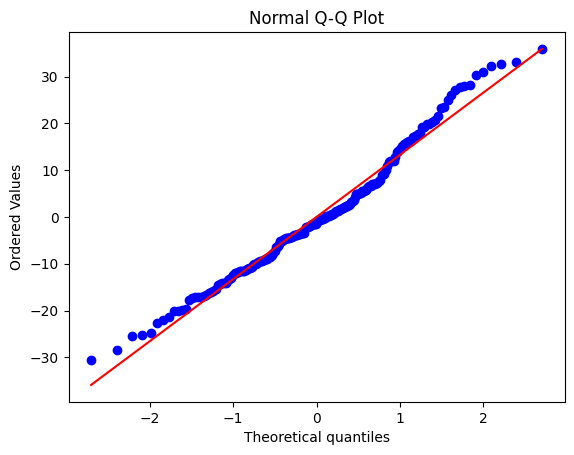

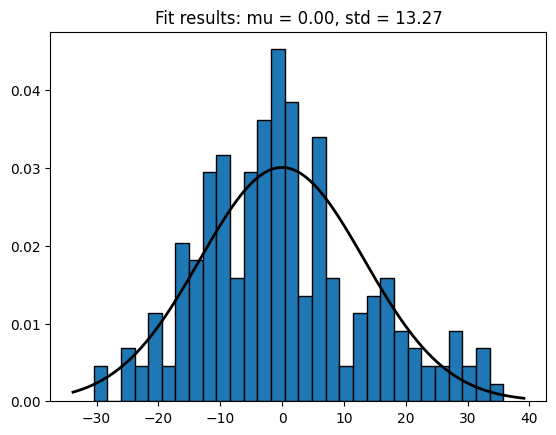

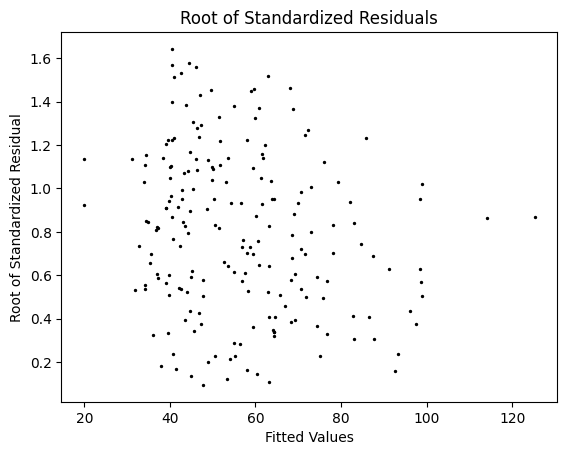

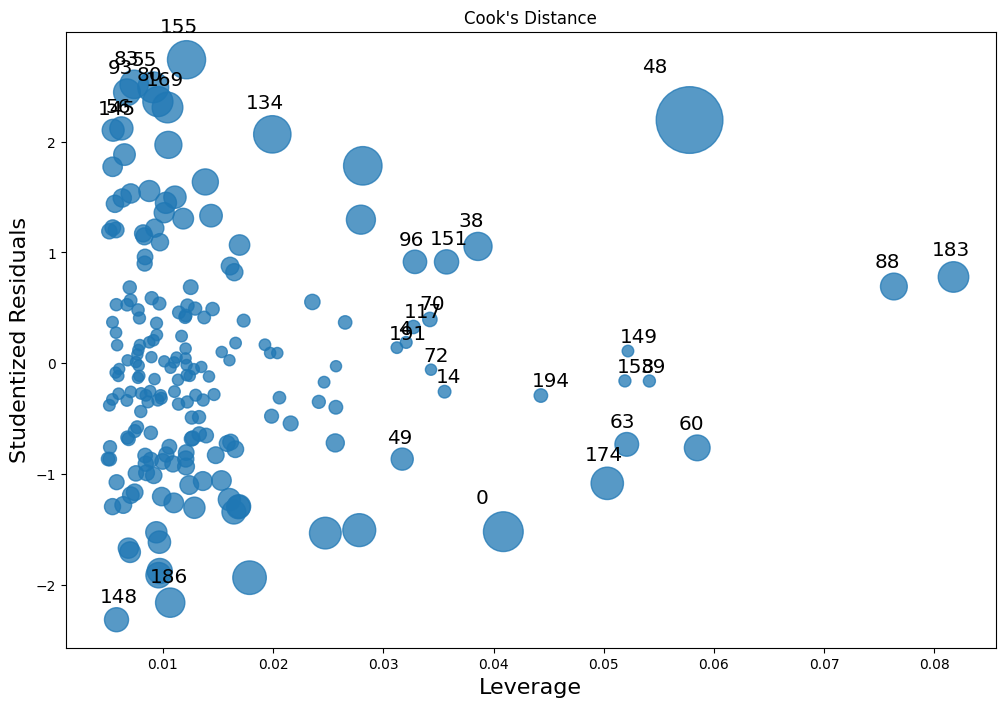

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
from sklearn.preprocessing import StandardScaler

# Function to load data
def load_data(file_path, sheet_name):
    return pd.read_excel(file_path, sheet_name=sheet_name)

# Function to run an OLS regression using a formula interface
def run_ols_formula(data, formula):
    model = ols(formula, data).fit()
    return model

# Function to plot residuals
def plot_residuals(predictions, residuals):
    plt.scatter(predictions, residuals, s=2, color='black')
    plt.hlines(0, min(predictions), max(predictions), color='red', linestyles='dashed')
    plt.xlabel("Model Prediction")
    plt.ylabel("Residual")
    plt.title("Residual Plot")
    plt.show()
    print('Mean of Residuals:', residuals.mean())

# Function to plot a Q-Q plot
def plot_qq(residuals):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    probplot(residuals, dist='norm', plot=ax)
    plt.title("Normal Q-Q Plot")
    plt.show()

# Function to plot histogram of residuals with fitted normal distribution
def plot_histogram_with_fit(residuals):
    mean, std = norm.fit(residuals)
    plt.hist(residuals, bins=30, edgecolor='black', density=True)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = f"Fit results: mu = {mean:.2f}, std = {std:.2f}"
    plt.title(title)
    plt.show()

# Function to plot standardized residuals
def plot_standardized_residuals(predictions, residuals):
    # Convert the Pandas Series to a NumPy array and reshape it
    residuals_array = residuals.values.reshape(-1, 1)
    scaler = StandardScaler().fit(residuals_array)
    norm_residuals = scaler.transform(residuals_array)

    plt.scatter(predictions, np.sqrt(np.abs(norm_residuals)), c='black', s=2)
    plt.xlabel("Fitted Values")
    plt.ylabel("Root of Standardized Residual")
    plt.title("Root of Standardized Residuals")
    plt.show()


# Function to plot Cook's distance
def plot_cooks_distance(model):
    fig, ax = plt.subplots(figsize=(12,8))
    sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
    plt.title("Cook's Distance")
    plt.show()

# Example usage
file_path = r"C:\Users\nicho\Downloads\MMA 860\Python\Class 3\MMA 860 Assessing and Testing Data File v1.0.xlsx"
data = load_data(file_path, 'Sales Data')
formula = 'Order_Size ~ Ad_Budget + Distance'
model = run_ols_formula(data, formula)
print(model.summary())

predictions = model.predict()
residuals = data['Order_Size'] - predictions

plot_residuals(predictions, residuals)
plot_qq(residuals)
plot_histogram_with_fit(residuals)
plot_standardized_residuals(predictions, residuals)
plot_cooks_distance(model)


                            OLS Regression Results                            
Dep. Variable:             Order_Size   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     178.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           5.64e-45
Time:                        19:48:13   Log-Likelihood:                -800.86
No. Observations:                 200   AIC:                             1608.
Df Residuals:                     197   BIC:                             1618.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8988      2.583     10.415      0.0

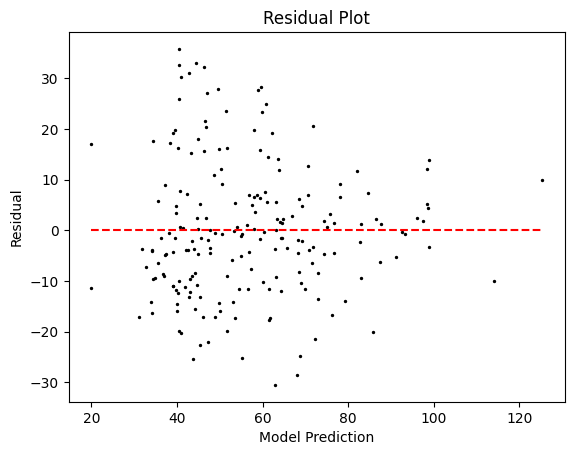

Mean of Residuals: 8.597567102697212e-15


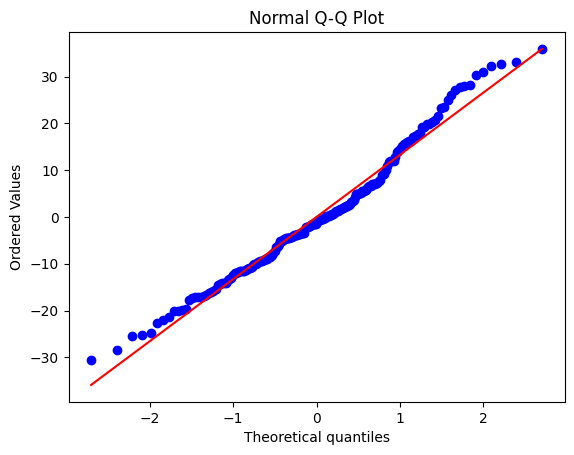

                            OLS Regression Results                            
Dep. Variable:             Order_Size   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     357.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           3.01e-46
Time:                        19:48:14   Log-Likelihood:                -801.10
No. Observations:                 200   AIC:                             1606.
Df Residuals:                     198   BIC:                             1613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.1951      1.773     15.904      0.0

In [3]:
# Basic Regression
file_path = r"C:\Users\nicho\Downloads\MMA 860\Python\Class 3\MMA 860 Assessing and Testing Data File v1.0.xlsx"

# a. Import the data from tab ‘Sales Data’.
data_sales = load_data(file_path, 'Sales Data')

# b. Run a linear regression model to explain order size in terms of Ad_Budget and Distance.
formula_sales = 'Order_Size ~ Ad_Budget + Distance'
model_sales = run_ols_formula(data_sales, formula_sales)
print(model_sales.summary())

# c. Assess the results. Are there problems?
predictions_sales = model_sales.predict(data_sales)
residuals_sales = data_sales['Order_Size'] - predictions_sales
plot_residuals(predictions_sales, residuals_sales)
plot_qq(residuals_sales)

# d. Determine if Distance belongs in the model.
# Check the p-value for 'Distance' in the summary output to assess significance.

# e. Rerun the model without distance.
formula_sales_no_dist = 'Order_Size ~ Ad_Budget'
model_sales_no_dist = run_ols_formula(data_sales, formula_sales_no_dist)
print(model_sales_no_dist.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.188e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.30e-206
Time:                        19:50:41   Log-Likelihood:                -1394.6
No. Observations:                 200   AIC:                             2795.
Df Residuals:                     197   BIC:                             2805.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1159.3613     82.674     14.023      0.0

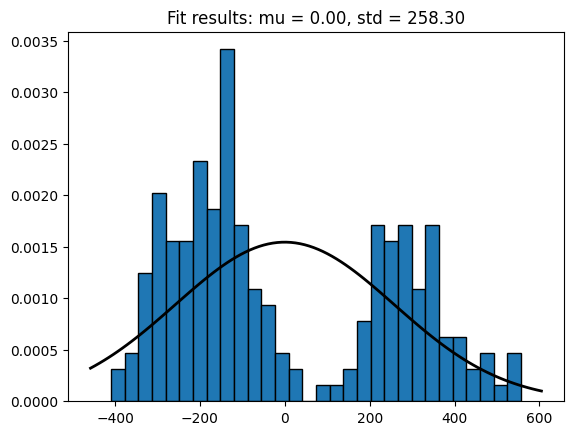

In [5]:
# Bimodal Error 1
data_bimodal1 = load_data(file_path, 'Bimodal Error 1')
formula_bimodal1 = 'Y ~ X1 + X2'
model_bimodal1 = run_ols_formula(data_bimodal1, formula_bimodal1)
print(model_bimodal1.summary())

predictions_bimodal1 = model_bimodal1.predict(data_bimodal1)
residuals_bimodal1 = data_bimodal1['Y'] - predictions_bimodal1
plot_histogram_with_fit(residuals_bimodal1)  # To see the distribution of error terms


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.483e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          2.89e-286
Time:                        19:51:51   Log-Likelihood:                -1201.3
No. Observations:                 200   AIC:                             2411.
Df Residuals:                     196   BIC:                             2424.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1014.1135     31.820     31.870      0.0

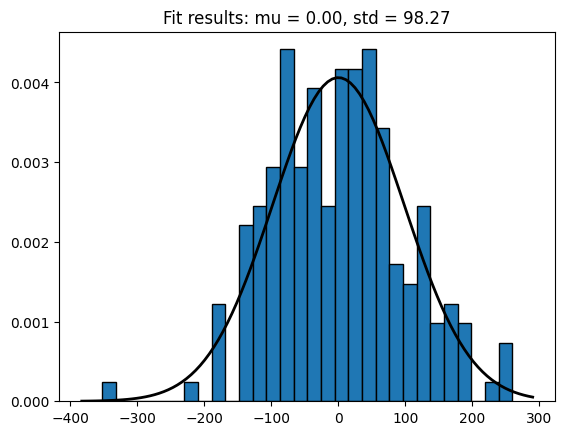

In [6]:
# Bimodal Error 2
data_bimodal2 = load_data(file_path, 'Bimodal Error 2')
formula_bimodal2 = 'Y ~ X1 + X2 + US'
model_bimodal2 = run_ols_formula(data_bimodal2, formula_bimodal2)
print(model_bimodal2.summary())

predictions_bimodal2 = model_bimodal2.predict(data_bimodal2)
residuals_bimodal2 = data_bimodal2['Y'] - predictions_bimodal2
plot_histogram_with_fit(residuals_bimodal2)


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     288.3
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           2.73e-40
Time:                        19:52:37   Log-Likelihood:                -1148.3
No. Observations:                 197   AIC:                             2301.
Df Residuals:                     195   BIC:                             2307.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    622.1634     13.176     47.219      0.0

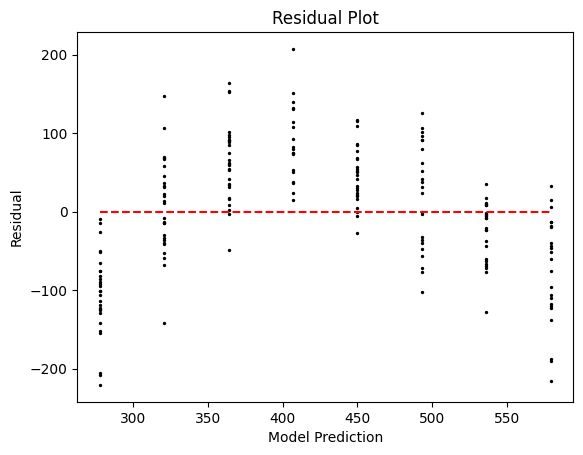

Mean of Residuals: 2.6459601571249215e-13


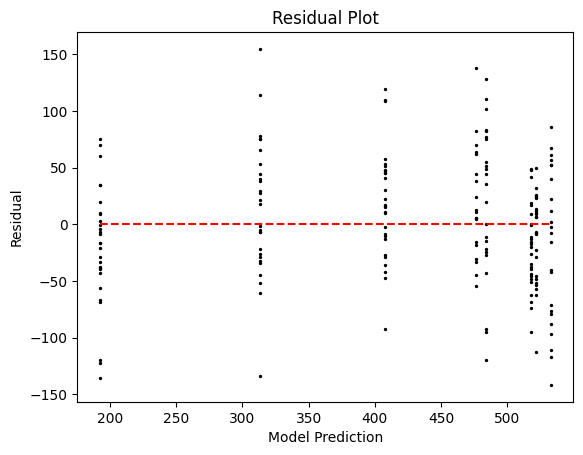

Mean of Residuals: -1.7716679787074172e-13


In [8]:
# Non-Normal Errors
data_nonlinear = load_data(file_path, 'Nonlinear')
formula_nonlinear = 'Y ~ X1'
model_nonlinear = run_ols_formula(data_nonlinear, formula_nonlinear)
print(model_nonlinear.summary())

predictions_nonlinear = model_nonlinear.predict(data_nonlinear)
residuals_nonlinear = data_nonlinear['Y'] - predictions_nonlinear
plot_residuals(predictions_nonlinear, residuals_nonlinear)

# d. Include X1Squared
data_nonlinear['X1Squared'] = data_nonlinear['X1']**2
formula_nonlinear_squared = 'Y ~ X1 + X1Squared'
model_nonlinear_squared = run_ols_formula(data_nonlinear, formula_nonlinear_squared)
plot_residuals(model_nonlinear_squared.predict(data_nonlinear), data_nonlinear['Y'] - model_nonlinear_squared.predict(data_nonlinear))


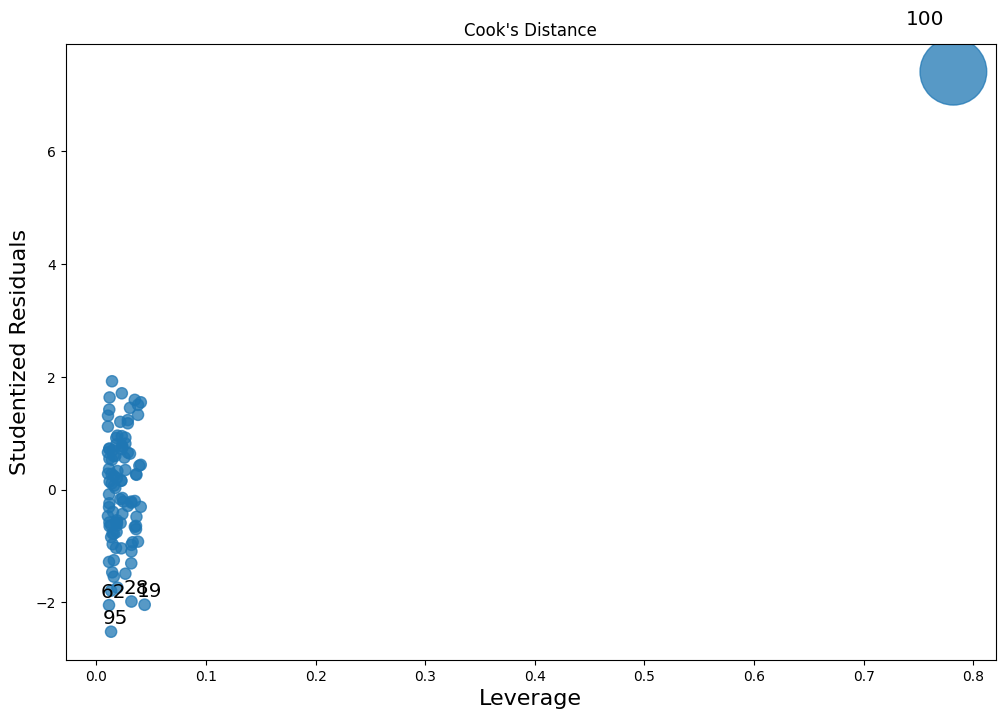

In [11]:
# Outliers
data_outliers = load_data(file_path, 'Outliers')
formula_outliers = 'Y ~ X + Outlier'
model_outliers = run_ols_formula(data_outliers, formula_outliers)
plot_cooks_distance(model_outliers)


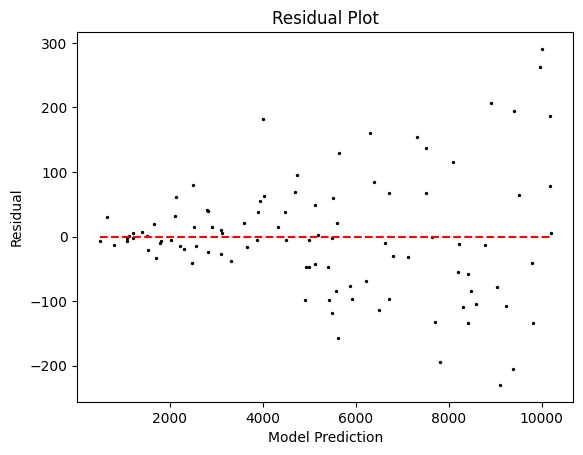

Mean of Residuals: 4.558842192636803e-12


In [12]:
# Heteroskedasticity
data_heteroskedasticity = load_data(file_path, 'Heteroskedasticity')
formula_heteroskedasticity = 'Y ~ X1 + X2'
model_heteroskedasticity = run_ols_formula(data_heteroskedasticity, formula_heteroskedasticity)
predictions_heteroskedasticity = model_heteroskedasticity.predict(data_heteroskedasticity)
residuals_heteroskedasticity = data_heteroskedasticity['Y'] - predictions_heteroskedasticity
plot_residuals(predictions_heteroskedasticity, residuals_heteroskedasticity)


In [15]:
# Collinearity
data_collinear = load_data(file_path, 'Collinear')
# Experience and Height
formula_exp_height = 'Y ~ Experience + Height'
model_exp_height = run_ols_formula(data_collinear, formula_exp_height)
print(model_exp_height.summary())

# Experience and Weight
formula_exp_weight = 'Y ~ Experience + Weight'
model_exp_weight = run_ols_formula(data_collinear, formula_exp_weight)
print(model_exp_weight.summary())

# Experience, Height, and Weight
formula_exp_height_weight = 'Y ~ Experience + Height + Weight'
model_exp_height_weight = run_ols_formula(data_collinear, formula_exp_height_weight)
print(model_exp_height_weight.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     255.0
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           2.36e-39
Time:                        19:56:25   Log-Likelihood:                -540.07
No. Observations:                 100   AIC:                             1086.
Df Residuals:                      97   BIC:                             1094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9241     16.868      0.055      0.9

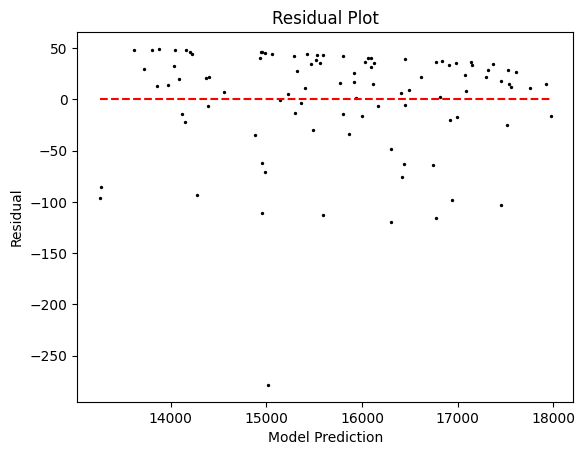

Mean of Residuals: 1.3119226667223517e-10


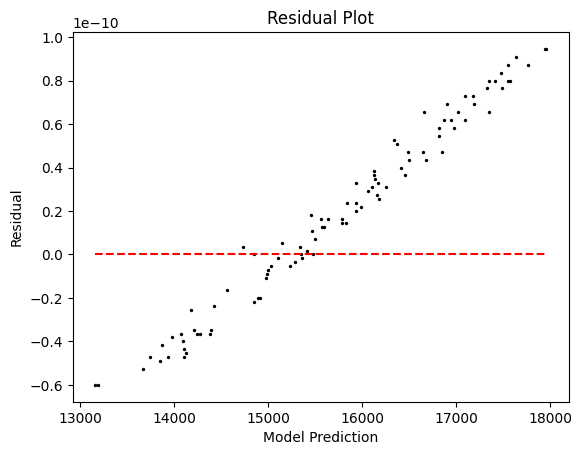

Mean of Residuals: 1.9165022375503766e-11


In [16]:
# Diminishing Returns
data_dim_returns = load_data(file_path, 'Diminishing Returns')
formula_dim_returns = 'Sales ~ Price + Ad_Budget'
model_dim_returns = run_ols_formula(data_dim_returns, formula_dim_returns)
predictions_dim_returns = model_dim_returns.predict(data_dim_returns)
residuals_dim_returns = data_dim_returns['Sales'] - predictions_dim_returns
plot_residuals(predictions_dim_returns, residuals_dim_returns)

# Include ln_ad_budget
data_dim_returns['ln_ad_budget'] = np.log(data_dim_returns['Ad_Budget'])
formula_dim_returns_log = 'Sales ~ Price + ln_ad_budget'
model_dim_returns_log = run_ols_formula(data_dim_returns, formula_dim_returns_log)
plot_residuals(model_dim_returns_log.predict(data_dim_returns), data_dim_returns['Sales'] - model_dim_returns_log.predict(data_dim_returns))
